In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns",None)

In [2]:
data=pd.read_csv("C:/users/daniel/documents/edureka/titanic/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data=data.drop(columns=["PassengerId","Name","Ticket"])

In [5]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
for i in data.columns:
    print(i,data[i].unique())

Survived [0 1]
Pclass [3 1 2]
Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'D

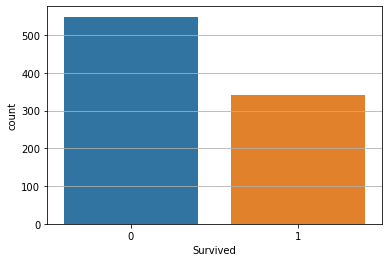

In [7]:
plt.grid()
sb.countplot(x=data["Survived"])
plt.show()

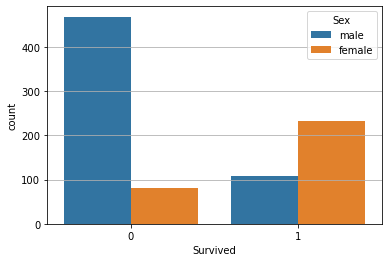

In [8]:
plt.grid()
sb.countplot(x=data["Survived"],hue=data["Sex"])
plt.show()

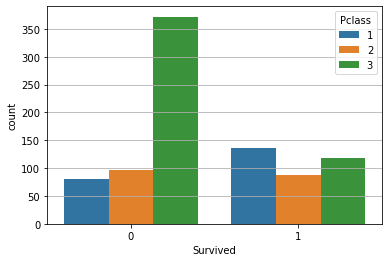

In [9]:
plt.grid()
sb.countplot(x=data["Survived"],hue=data["Pclass"])
plt.show()

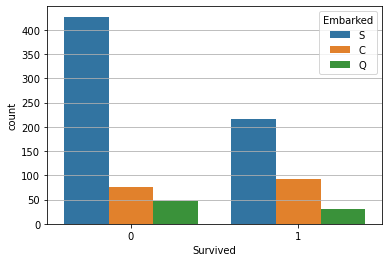

In [10]:
plt.grid()
sb.countplot(x=data["Survived"],hue=data["Embarked"])
plt.show()

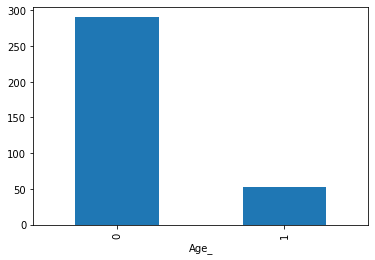

In [11]:
data["Age_"]=np.where(data["Age"].isnull(),1,0)

data.groupby(["Age_"])["Survived"].sum().plot(kind="bar")
plt.show()

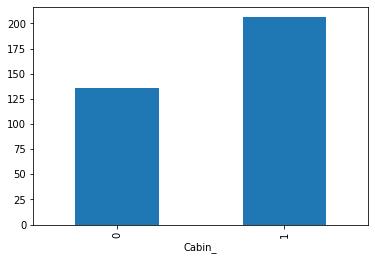

In [12]:
data["Cabin_"]=np.where(data["Cabin"].isnull(),1,0)

data.groupby(["Cabin_"])["Survived"].sum().plot(kind="bar")
plt.show()

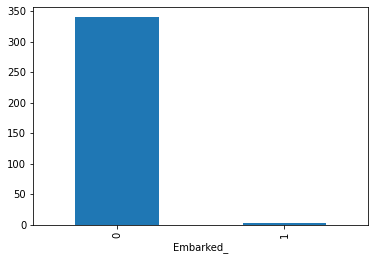

In [13]:
data["Embarked_"]=np.where(data["Embarked"].isnull(),1,0)

data.groupby(["Embarked_"])["Survived"].sum().plot(kind="bar")
plt.show()

In [14]:
data["Cabin"]=data["Cabin"].str[0]

In [15]:
data["Cabin"].value_counts(dropna=False)

NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Cabin, dtype: int64

In [16]:
data["Cabin"]=data["Cabin"].fillna("M")

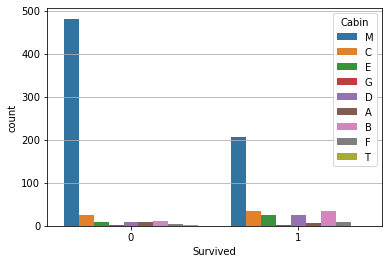

In [17]:
plt.grid()
sb.countplot(x=data["Survived"],hue=data["Cabin"])
plt.show()

In [18]:
data.groupby(["Cabin"])["Survived"].sum().sort_values()

Cabin
T      0
G      2
A      7
F      8
E     24
D     25
B     35
C     35
M    206
Name: Survived, dtype: int64

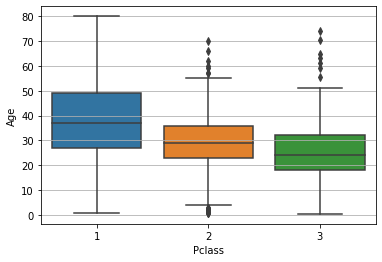

In [19]:
plt.grid()

sb.boxplot(x=data["Pclass"],y=data["Age"])

plt.show()

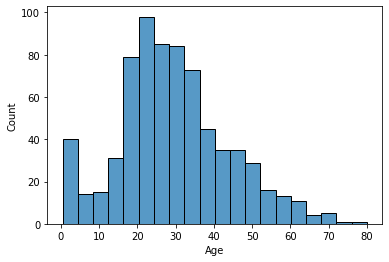

In [20]:
sb.histplot(x=data["Age"])

plt.show()

<AxesSubplot:xlabel='Age'>

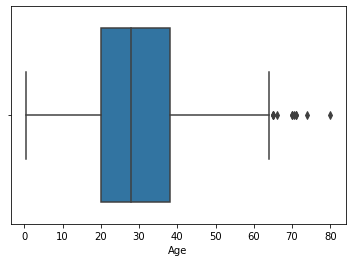

In [21]:
sb.boxplot(x=data["Age"])

In [22]:
data["Age"]=data[["Age","Pclass"]]


In [23]:

def impute_age(col):
    Age=col[0]
    Pclass=col[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [24]:
data["Age"]=data[["Age","Pclass"]].apply(impute_age,axis=1)

In [25]:
#num_col=[i for i in data.columns if data[i].dtypes !="O" and len(data[i].unique())>25]

#data[num_col].head()

In [26]:
#for i in num_col:
 #   plt.grid()
  #  sb.distplot(data[i],kde=False,bins=20)
   # plt.ylabel("Count")
    #plt.show()

In [27]:
data["Age"].isnull().sum()

0

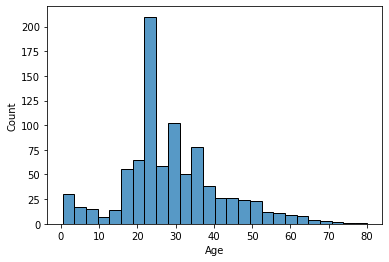

In [28]:
sb.histplot(x=data["Age"])

plt.show()

<AxesSubplot:xlabel='Age'>

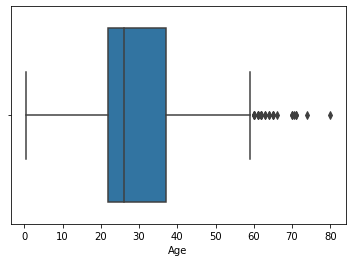

In [29]:
sb.boxplot(x=data["Age"])

In [31]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_,Cabin_,Embarked_
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0,1,0
